In [32]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import hvplot.pandas

In [33]:
# Import our input dataset
Spotify =  Path('spotify_data_trimmed2.csv')
Spotify_df = pd.read_csv(Spotify)
Spotify_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
1,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
2,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
3,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
4,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin


In [34]:
clean_df=Spotify_df.loc[:,['popularity','duration_ms','danceability','energy','track_genre']]
clean_df.head()

,popularity,duration_ms,danceability,energy,track_genre
0,100,156943,0.714,0.472,dance
1,99,198937,0.621,0.782,hip-hop
2,98,175238,0.561,0.965,dance
3,98,162637,0.835,0.679,latin
4,97,178567,0.911,0.712,latin


In [35]:
y = clean_df['popularity']
X = clean_df[["duration_ms"]]

In [36]:
model = LinearRegression()

In [37]:
model.fit(X, y)

LinearRegression()

In [38]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [-2.30672635e-06]


In [39]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 67.86722311139967


In [40]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 67.86722311139967 + -2.3067263539625086e-06X


In [41]:
# Make predictions using the X set
predicted_y_values = model.predict(X)

In [42]:
# Create a copy of the original data
df_predicted = clean_df.copy()

# Add a column with the predicted salary values
df_predicted["popularity_predicted"] = predicted_y_values

# Display sample data
df_predicted.head()

,popularity,duration_ms,danceability,energy,track_genre,popularity_predicted
0,100,156943,0.714,0.472,dance,67.505199
1,99,198937,0.621,0.782,hip-hop,67.408330
2,98,175238,0.561,0.965,dance,67.462997
3,98,162637,0.835,0.679,latin,67.492064
4,97,178567,0.911,0.712,latin,67.455318


In [44]:
best_fit_line = df_predicted.hvplot.line(
    x = "duration_ms",
    y = "popularity_predicted",
    color = "red"
)
best_fit_line

:Curve   [duration_ms]   (popularity_predicted)

In [12]:
y = clean_df['popularity']
X = clean_df[["duration_ms"]]
y = (y > y.median()).astype(int)
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=15, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=10, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=30)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.5526 - loss: 0.6860
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5455 - loss: 0.6843
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.5534 - loss: 0.6815
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5434 - loss: 0.6841
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.5379 - loss: 0.6826
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.5494 - loss: 0.6825
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5451 - loss: 0.6829
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5463 - loss: 0.6808
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.5348 - loss: 0.6835
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.5520 - loss: 0.6804
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.5579 - loss: 0.6805
Epoch 12/30
235/235 ━━━━━━━━━━

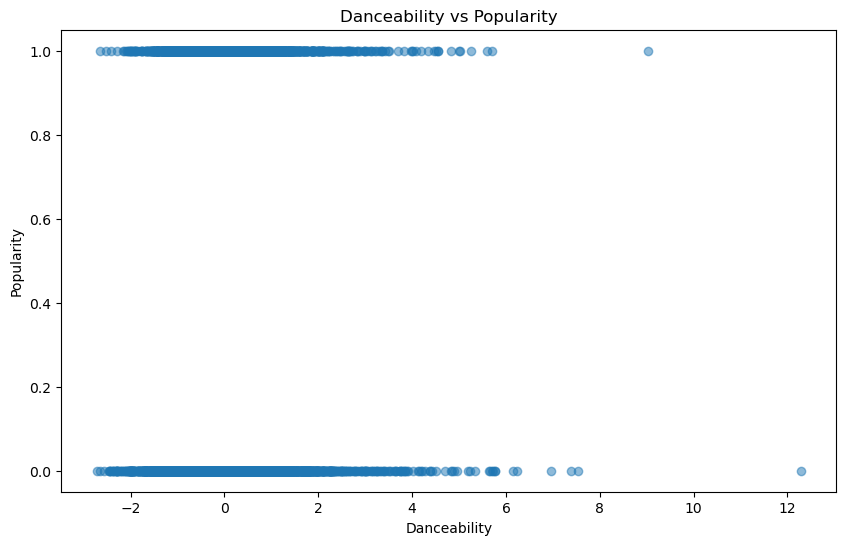

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled, y_train, alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.title('Danceability vs Popularity')
plt.show()